## HR Analysis

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


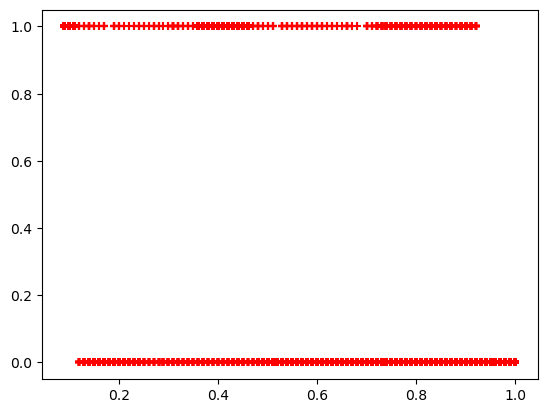

In [12]:
plt.scatter(df.satisfaction_level, df.left, marker='+',color='red')

<BarContainer object of 14999 artists>

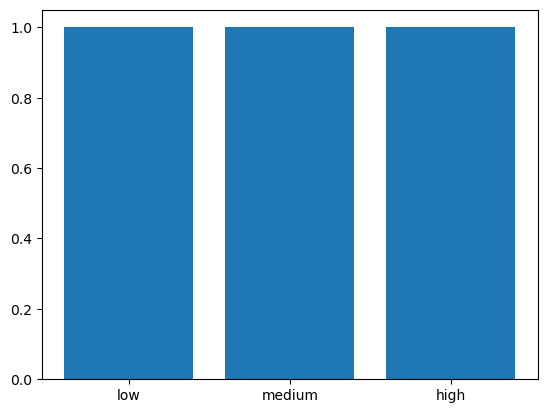

In [24]:
plt.bar(df.salary, df.left)

#### Clear and direct correlation

In [20]:
numeric_data = df.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
correlation_with_left = correlation_matrix['left'].abs().sort_values(ascending=False)
top_two_factors = correlation_with_left.index[1:3]
print("Top two factors impacting employee retention:")
print(top_two_factors)

Top two factors impacting employee retention:
Index(['satisfaction_level', 'Work_accident'], dtype='object')


In [21]:
import seaborn as sns

/var/folders/6j/g9m_6b1n2r1g4l8f9cdpn44m0000gn/T/ipykernel_68463/459972092.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary', y='retention_rate', data=salary_retention, palette='viridis')


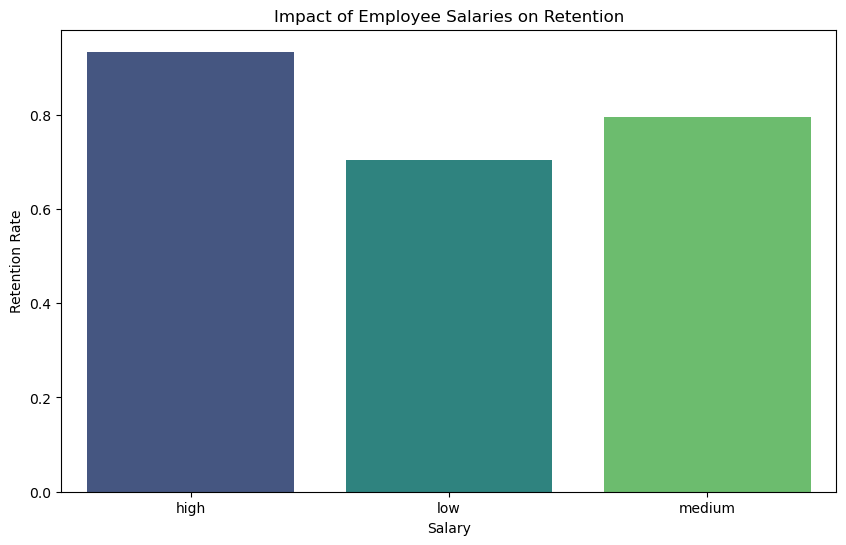

In [23]:
# Calculate retention rate for each salary group
salary_retention = df.groupby('salary')['left'].mean().reset_index()
salary_retention['retention_rate'] = 1 - salary_retention['left']

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='salary', y='retention_rate', data=salary_retention, palette='viridis')
plt.title('Impact of Employee Salaries on Retention')
plt.xlabel('Salary')
plt.ylabel('Retention Rate')
plt.show()